In [4]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as plt
import os
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import json
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

In [5]:
# Loading LL84 data
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/" + 'Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [6]:
nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [7]:
# Loading PLUTO data
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/mn_mappluto_16v1/" + 'MNMapPLUTO.shp')

In [8]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [9]:
# Droping redundant variables
bsize_short = bsize[['BBL', 'UnitsTotal']]
bsize_short.head()

,BBL,UnitsTotal
0,1.015450e+09,18
1,1.007238e+09,50
2,1.016800e+09,10
3,1.013850e+09,32
4,1.011970e+09,26


In [10]:
bsize_short.describe()

,BBL,UnitsTotal
count,4.269700e+04,42697.000000
mean,1.012295e+09,24.545799
std,6.104073e+06,92.907025
min,1.000010e+09,0.000000
25%,1.007000e+09,2.000000
50%,1.012510e+09,8.000000
75%,1.017560e+09,20.000000
max,1.022552e+09,8805.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36cbdf2790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f36cf287c90>]], dtype=object)

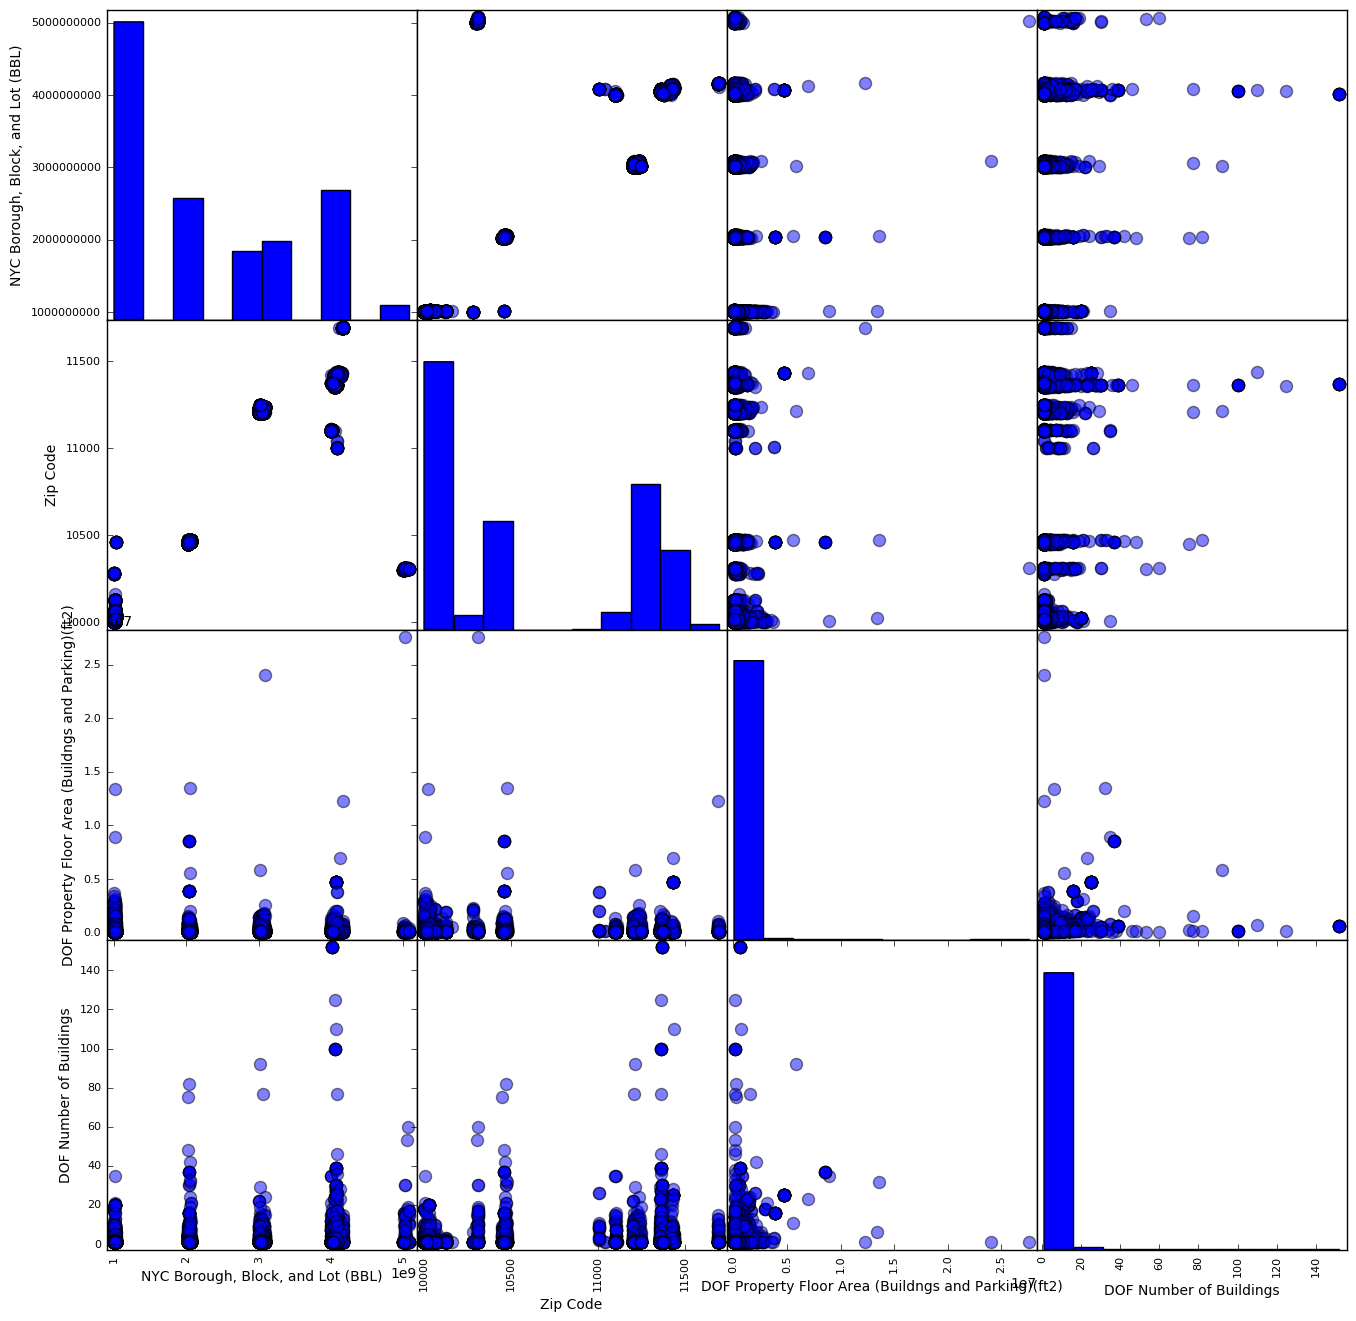

In [11]:
scatter_matrix (nrg, s=300, figsize=(16, 16))

### Figure 1:
Show the scatter matrix of the LL84 data

In [12]:
# Convert variables to numeric values
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors='coerce')
nrg['BBL'] = pd.to_numeric(nrg['NYC Borough, Block, and Lot (BBL)'], errors='coerce')
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = pd.to_numeric(nrg['Reported Property Floor Area (Building(s)) (ft²)'], 
                                                                     errors='coerce')

In [13]:
print (nrg['Site EUI(kBtu/ft2)'].astype(float)[:10])
print (nrg['BBL'].astype(float)[:10])
print (nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)[:10])

In [14]:
bsize.BBL.astype(float)

0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

In [15]:
# Droping variables
nrg_short = nrg[['BBL', 'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)']]

In [16]:
nrg_short.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,1.000410e+09,NaN,918919.0
14354,4.021460e+09,NaN,NaN
12150,2.027620e+09,NaN,64200.0
12590,1.006700e+09,NaN,NaN
15591,2.048300e+09,NaN,50000.0


In [17]:
# Merging the two datasets based on BBL
bblnrgdata = pd.merge(nrg_short, bsize_short, on='BBL')

In [18]:
bblnrgdata.dtypes

BBL                                                 float64
Site EUI(kBtu/ft2)                                  float64
Reported Property Floor Area (Building(s)) (ft²)    float64
UnitsTotal                                            int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36c52e1910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f36d227f3d0>]], dtype=object)

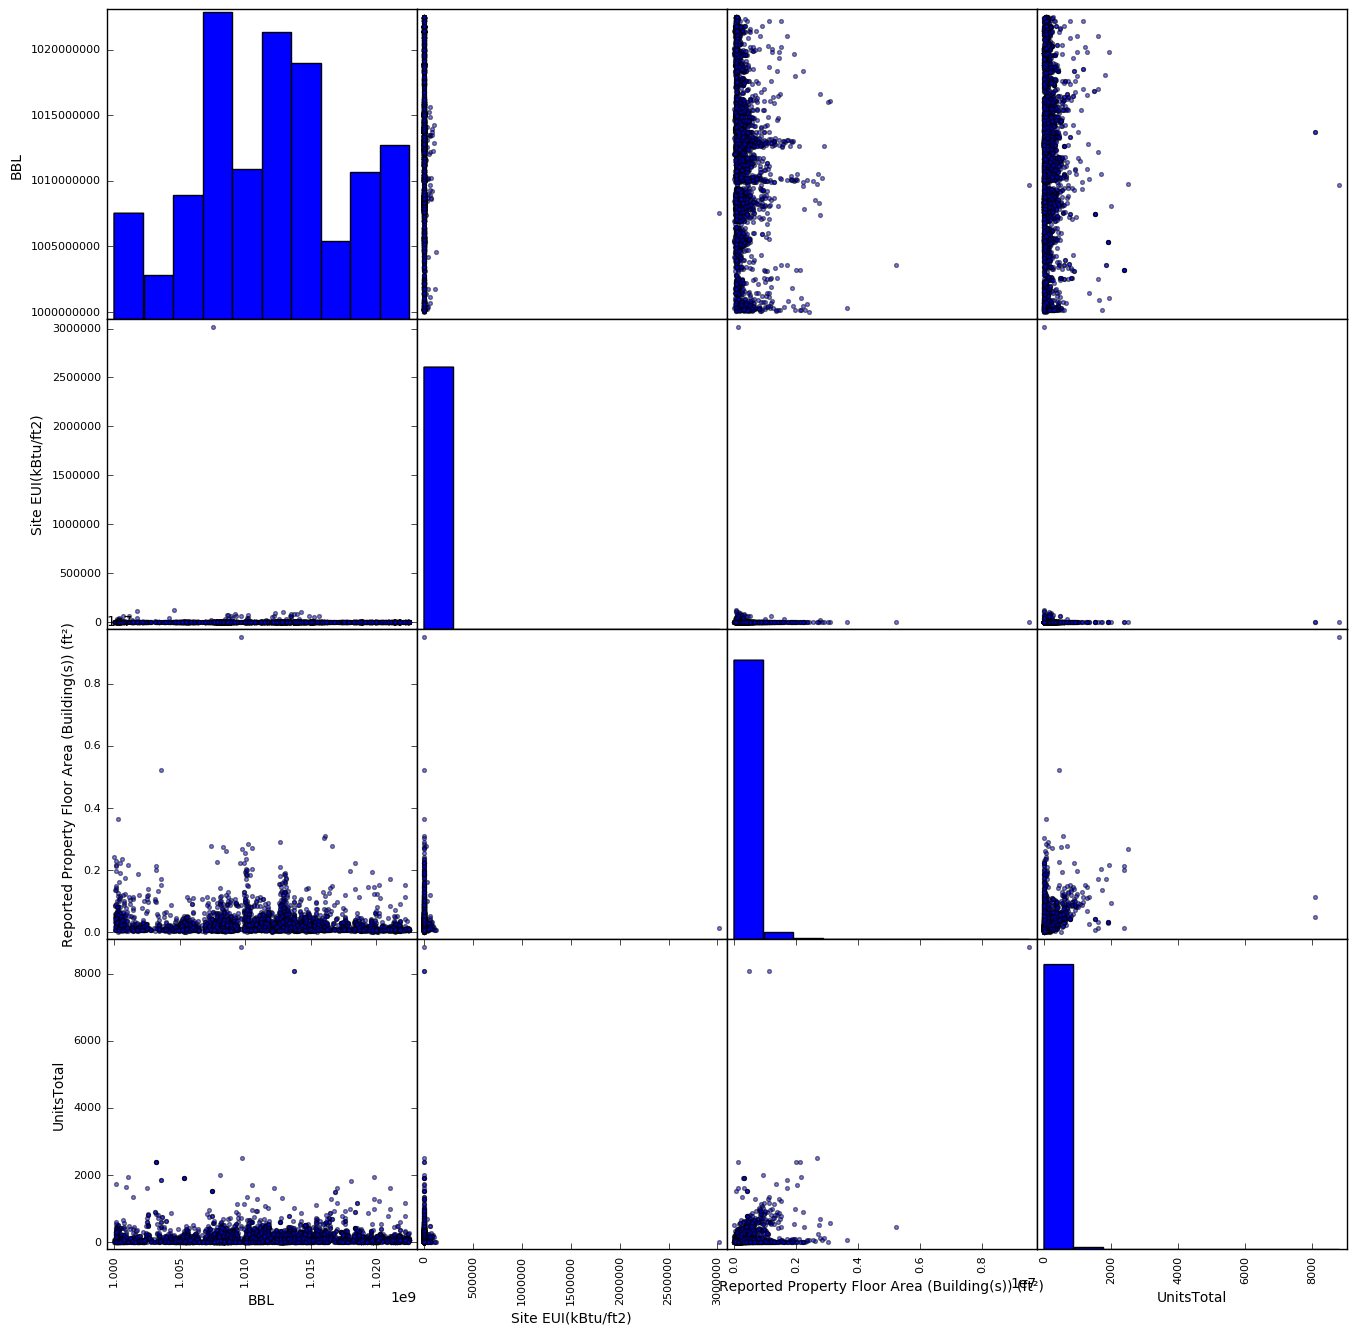

In [19]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

### Figure 2:
Sactter matrix of the merged dataset

In [20]:
# Calculating total building energy consumption
bblnrgdata['TotEnergy']=bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)']

In [21]:
bblnrgdata.describe()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsTotal,TotEnergy
count,6.492000e+03,5.077000e+03,5.579000e+03,6492.000000,5.069000e+03
mean,1.012037e+09,1.161758e+03,2.139771e+05,108.948090,2.136455e+08
std,5.665916e+06,4.272501e+04,3.248771e+05,252.170956,5.245490e+09
min,1.000010e+09,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.008180e+09,NaN,NaN,17.000000,NaN
50%,1.012344e+09,NaN,NaN,58.000000,NaN
75%,1.015438e+09,NaN,NaN,116.000000,NaN
max,1.022500e+09,3.018493e+06,9.515627e+06,8805.000000,3.501452e+11


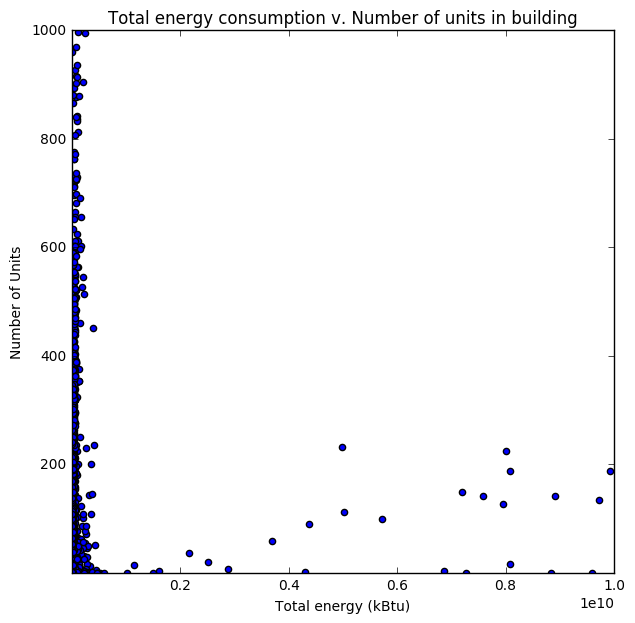

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(bblnrgdata.TotEnergy, bblnrgdata.UnitsTotal)
plt.xlim(1000,1e10)
plt.ylim(1,1000)
plt.title('Total energy consumption v. Number of units in building')
plt.xlabel('Total energy (kBtu)')
plt.ylabel('Number of Units')

### Figure 3:
Showing the total energy consumption of a building versus the number of units included in it.

In [23]:
# Filtering values, and calculating log of units and consumption
bblnrgdata_cut = bblnrgdata[(bblnrgdata['Site EUI(kBtu/ft2)']> 50) & (bblnrgdata['Site EUI(kBtu/ft2)']<800) & 
                            (bblnrgdata['UnitsTotal']>2)]
bblnrgdata_cut['UnitsTotal_log'] = np.log10(bblnrgdata_cut.UnitsTotal)
bblnrgdata_cut['TotEnergy_log'] = np.log10(bblnrgdata_cut.TotEnergy)
bblnrgdata_cut['UnitsTotal_log_sq'] = bblnrgdata_cut.UnitsTotal_log*bblnrgdata_cut.UnitsTotal_log
bblnrgdata_cut.reset_index(inplace=True)
bblnrgdata_cut.describe()

,index,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsTotal,TotEnergy,UnitsTotal_log,TotEnergy_log,UnitsTotal_log_sq
count,3989.000000,3.989000e+03,3989.000000,3.983000e+03,3989.000000,3.983000e+03,3989.000000,3983.000000,3989.000000
mean,2860.757834,1.012310e+09,92.857909,2.035878e+05,125.295061,1.935301e+07,1.835358,7.073372,3.598478
std,1608.768547,5.468311e+06,39.333659,3.069121e+05,279.057537,3.270929e+07,0.479578,0.370490,1.736165
min,2.000000,1.000048e+09,50.100000,5.900000e+03,3.000000,7.975720e+05,0.477121,5.901770,0.227645
25%,1487.000000,1.008398e+09,71.600000,NaN,39.000000,NaN,1.591065,NaN,2.531487
50%,2863.000000,1.012600e+09,85.400000,NaN,71.000000,NaN,1.851258,NaN,3.427157
75%,4234.000000,1.015310e+09,104.200000,NaN,136.000000,NaN,2.133539,NaN,4.551988
max,5782.000000,1.022500e+09,756.300000,9.515627e+06,8805.000000,5.490517e+08,3.944729,8.739613,15.560890


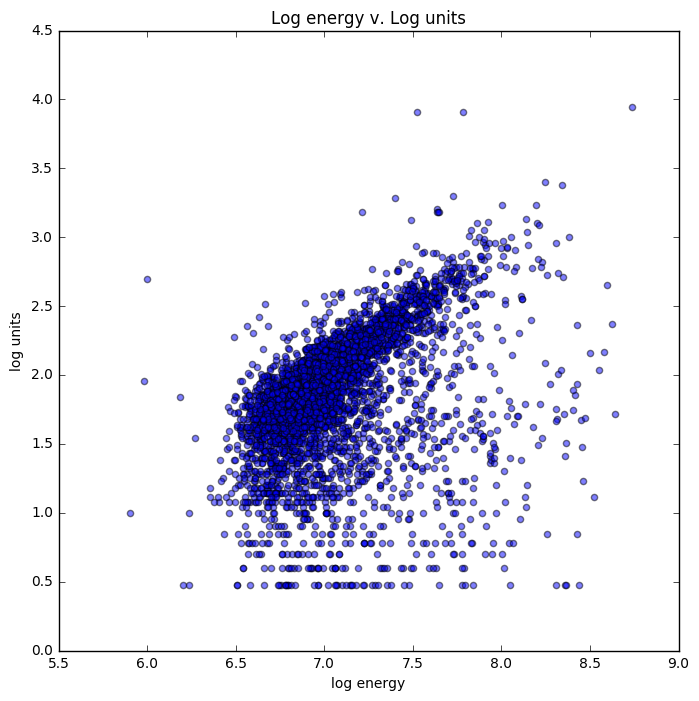

In [24]:
# Plot the log of the two variables.
plt.figure(figsize=(8,8))
plt.xlabel('log energy')
plt.ylabel('log units')
plt.title('Log energy v. Log units')
plt.scatter(bblnrgdata_cut.TotEnergy_log, bblnrgdata_cut.UnitsTotal_log, alpha=.5, s=20 )
plt.show()

### Figure 4:
Showing the log of total energy versus the log of total number of units.

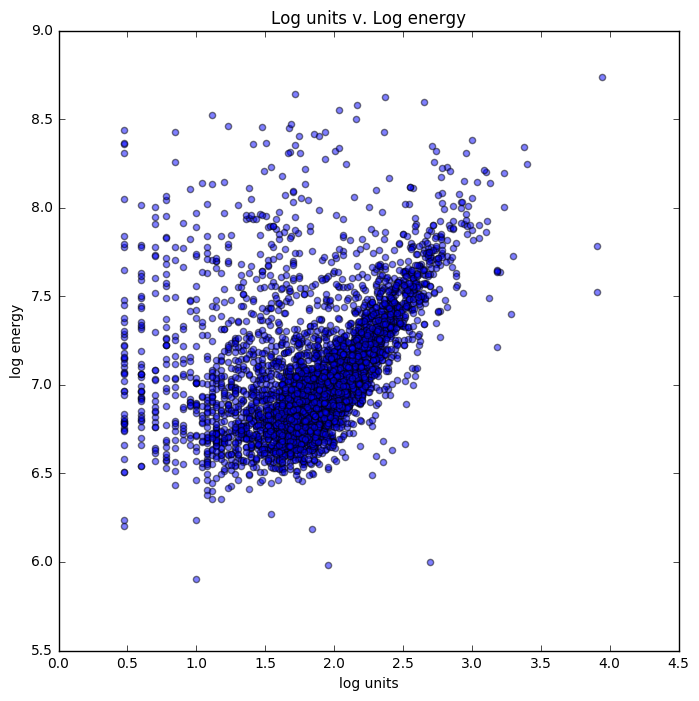

In [25]:
# Plot the log of the two variables.
plt.figure(figsize=(8,8))
plt.xlabel('log units')
plt.ylabel('log energy')
plt.title('Log units v. Log energy')
plt.scatter(bblnrgdata_cut.UnitsTotal_log, bblnrgdata_cut.TotEnergy_log, alpha=.5, s=20 )
plt.show()

### Figure 5:
Showing the log of total number of units versus the log of total energy consumption.

# Predicting total energy consumption given the total units

In [26]:
y = bblnrgdata_cut.TotEnergy_log
X = sm.add_constant(bblnrgdata_cut.UnitsTotal_log)

In [27]:
model = sm.OLS(y, X, missing='drop')
result = model.fit()

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotEnergy_log   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     667.0
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.09e-136
Time:                        12:58:29   Log-Likelihood:                -1387.8
No. Observations:                3983   AIC:                             2780.
Df Residuals:                    3981   BIC:                             2792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              6.5362      0.021    304.049      0.000         6.494     6.578
UnitsTotal_log     0.2926      0.011     25.827      0.000         0.270     0.315
==============================================================================
Omnibus:                     1059.230   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2768.382
Skew:                           1.427   Prob(JB):                         0.00
Kurtosis:                       5.922   Cond. No.                         9.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

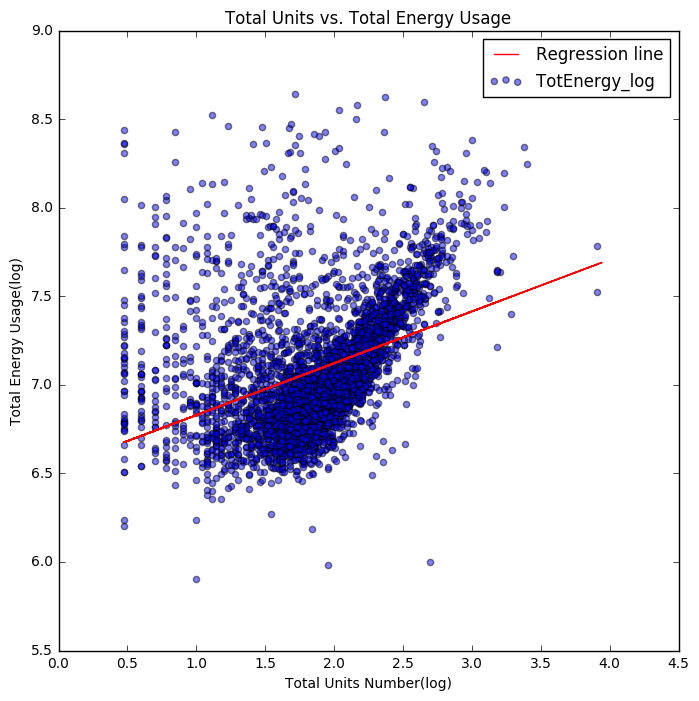

In [29]:
y_fit = result.predict(X)
plt.figure(figsize=(8,8))
xlabel('Total Units Number(log)')
ylabel('Total Energy Usage(log)')
plt.title('Total Units vs. Total Energy Usage')
plt.scatter(bblnrgdata_cut.UnitsTotal_log, y, alpha=.5, s=20 )
plt.plot(bblnrgdata_cut.UnitsTotal_log, y_fit, color = 'r', label = 'Regression line')
plt.legend()
plt.show()

### Figure 6:
Showing the regresion line fitted after training the first model (Total Units Number as independent variable)

# Predicting total units given total energy consumption

In [30]:
y2 = bblnrgdata_cut.UnitsTotal_log
X2 = sm.add_constant(bblnrgdata_cut.TotEnergy_log)

In [31]:
model2 = sm.OLS(y2, X2, missing='drop')
result2 = model2.fit()

In [32]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UnitsTotal_log   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     667.0
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.09e-136
Time:                        12:58:30   Log-Likelihood:                -2416.4
No. Observations:                3983   AIC:                             4837.
Df Residuals:                    3981   BIC:                             4849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -1.6333      0.135    -12.143      0.000        -1.897    -1.370
TotEnergy_log     0.4904      0.019     25.827      0.000         0.453     0.528
==============================================================================
Omnibus:                      753.265   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1457.700
Skew:                          -1.147   Prob(JB):                         0.00
Kurtosis:                       4.878   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

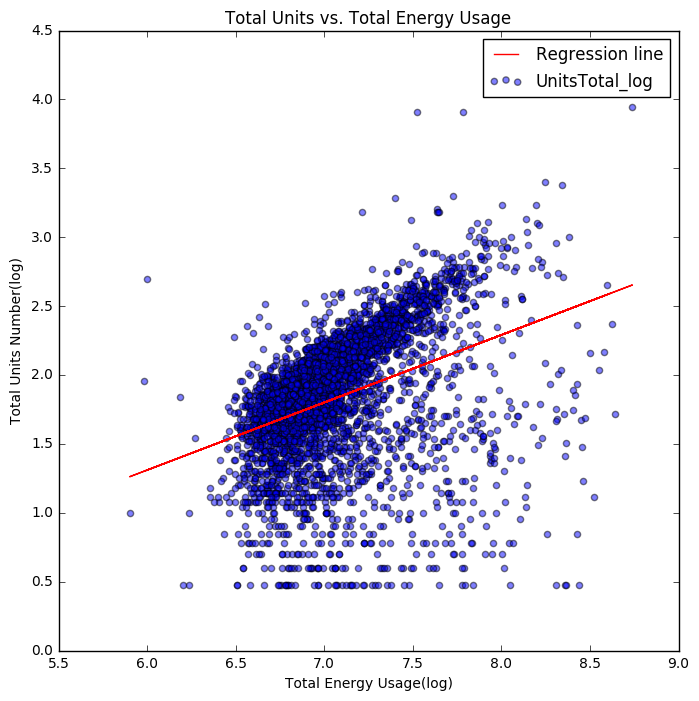

In [33]:
y_fit2 = result2.predict(X2)
plt.figure(figsize=(8,8))
xlabel('Total Energy Usage(log)')
ylabel('Total Units Number(log)')
plt.title('Total Units vs. Total Energy Usage')
plt.scatter(bblnrgdata_cut.TotEnergy_log, y2, alpha=.5, s=20 )
plt.plot(bblnrgdata_cut.TotEnergy_log, y_fit2, color = 'r', label = 'Regression line')
plt.legend()
plt.show()

### Figure 7:
Showing the regresion line fitted after training the second model (Total Energy Usage as independent variable)

# Chi square test

In [34]:
# Calculate chi square statistic for first model
chisq1 = np.sum(((y_fit - y)**2)/np.sqrt(y)**2)
chisq1

62.811161081130038

In [35]:
# Calculate chi square statistic for second model
chisq2 = np.sum(((y_fit2 - y2)**2)/np.sqrt(y2)**2)
chisq2

766.56816444132255

The chi-square for the first model gives a lower score, indicating that this is the model that better explains the data including uncertainties, since the chi-square value of an ideal model should be equal to 1. Additionally, intuitively predicting consumption given the number of building units makes more sense and could be more useful. Thus, we select the first model and proceed into further analysis.

# Polynomial fit

In [36]:
bblnrgdata_cut.describe()

,index,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsTotal,TotEnergy,UnitsTotal_log,TotEnergy_log,UnitsTotal_log_sq
count,3989.000000,3.989000e+03,3989.000000,3.983000e+03,3989.000000,3.983000e+03,3989.000000,3983.000000,3989.000000
mean,2860.757834,1.012310e+09,92.857909,2.035878e+05,125.295061,1.935301e+07,1.835358,7.073372,3.598478
std,1608.768547,5.468311e+06,39.333659,3.069121e+05,279.057537,3.270929e+07,0.479578,0.370490,1.736165
min,2.000000,1.000048e+09,50.100000,5.900000e+03,3.000000,7.975720e+05,0.477121,5.901770,0.227645
25%,1487.000000,1.008398e+09,71.600000,NaN,39.000000,NaN,1.591065,NaN,2.531487
50%,2863.000000,1.012600e+09,85.400000,NaN,71.000000,NaN,1.851258,NaN,3.427157
75%,4234.000000,1.015310e+09,104.200000,NaN,136.000000,NaN,2.133539,NaN,4.551988
max,5782.000000,1.022500e+09,756.300000,9.515627e+06,8805.000000,5.490517e+08,3.944729,8.739613,15.560890


In [37]:
y = bblnrgdata_cut.TotEnergy_log
X3 = bblnrgdata_cut[['UnitsTotal_log', 'UnitsTotal_log_sq']]
X3 = sm.add_constant(X3)

In [38]:
# Fitting a regression using an additional independent variable that is the squared log of total units
model3 = sm.OLS(y, X3, missing='drop')
result3 = model3.fit()

In [39]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotEnergy_log   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     901.7
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          9.88e-324
Time:                        12:58:31   Log-Likelihood:                -952.02
No. Observations:                3983   AIC:                             1910.
Df Residuals:                    3980   BIC:                             1929.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 7.7190      0.043    181.516      0.000         7.636     7.802
UnitsTotal_log       -1.1537      0.047    -24.312      0.000        -1.247    -1.061
UnitsTotal_log_sq     0.4090      0.013     31.201      0.000         0.383     0.435
==============================================================================
Omnibus:                     1204.987   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5416.360
Skew:                           1.401   Prob(JB):                         0.00
Kurtosis:                       7.978   Cond. No.                         59.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

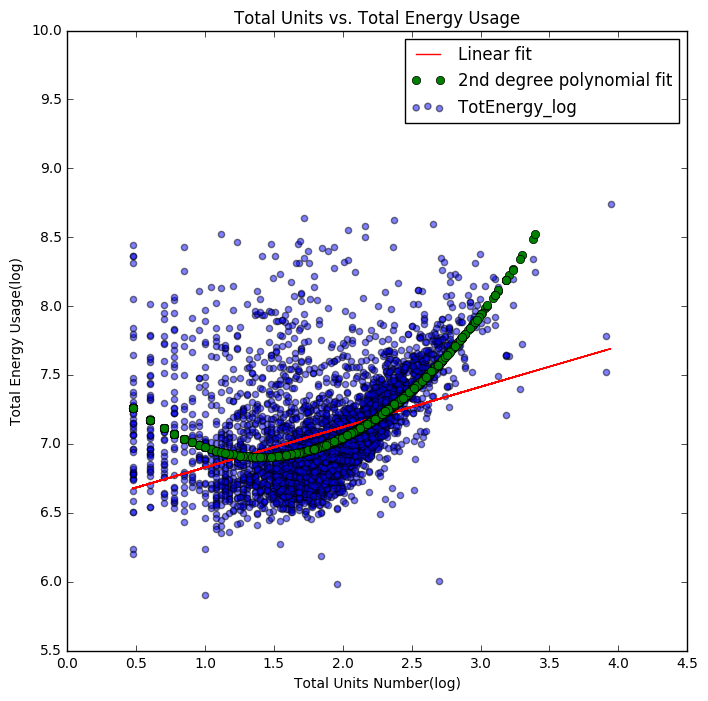

In [40]:
y_fit3 = result3.predict(X3)
plt.figure(figsize=(8,8))
xlabel('Total Units Number(log)')
ylabel('Total Energy Usage(log)')
plt.title('Total Units vs. Total Energy Usage')
plt.scatter(bblnrgdata_cut.UnitsTotal_log, y, alpha=.5, s=20 )
plt.plot(bblnrgdata_cut.UnitsTotal_log, y_fit, color = 'r', label = 'Linear fit')
plt.plot(bblnrgdata_cut.UnitsTotal_log, y_fit3,'o', color = 'g', label = '2nd degree polynomial fit')
plt.legend()
plt.show()

### Figure 8:
Scatter plot of the log of total units versus the log of total energy usage. Linear and 2nd degree polynomial are used to fit the data.

In [41]:
# Calculating likelihood ratio
LR = -2 * (result.llf - result3.llf)
LR

871.54813806963284

In [42]:
# Calculating the same, directly from statsmodels package
result3.compare_lr_test(result)

(871.54813806963284, 1.5032248703752167e-191, 1.0)

The likelihood ratio result is consistant in both cases. The value __871__ is a lot larger than 3.84 (the chi-square critical value for a=0.05 and df=1). In this case df=1 since the linear model has one variable less than the polynomial one.

Thus, we can claim that the polynomial model fits the data significantly better than the linear one.

# Extra Credit #1

In [43]:
y_ec = bblnrgdata_cut.TotEnergy_log
X_ec = sm.add_constant(bblnrgdata_cut.UnitsTotal_log)

model_ec = sm.OLS(y_ec, X_ec, missing='drop')
result_ec = model_ec.fit()

In [44]:
result_ec.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotEnergy_log   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     667.0
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.09e-136
Time:                        12:58:32   Log-Likelihood:                -1387.8
No. Observations:                3983   AIC:                             2780.
Df Residuals:                    3981   BIC:                             2792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              6.5362      0.021    304.049      0.000         6.494     6.578
UnitsTotal_log     0.2926      0.011     25.827      0.000         0.270     0.315
==============================================================================
Omnibus:                     1059.230   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2768.382
Skew:                           1.427   Prob(JB):                         0.00
Kurtosis:                       5.922   Cond. No.                         9.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
bblnrgdata_cut.head()

,index,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsTotal,TotEnergy,UnitsTotal_log,TotEnergy_log,UnitsTotal_log_sq
0,2,1.013110e+09,125.4,330000.0,56,41382000.0,1.748188,7.616811,3.056161
1,15,1.007660e+09,122.3,59468.0,8,7272936.4,0.903090,6.861710,0.815572
2,16,1.008150e+09,117.0,364000.0,24,42588000.0,1.380211,7.629287,1.904983
3,18,1.005050e+09,82.1,235370.0,24,19323877.0,1.380211,7.286094,1.904983
4,19,1.021420e+09,137.7,64806.0,62,8923786.2,1.792392,6.950549,3.212668


In [46]:
# Define a function to compute the error given a dependent, an independent variable, and the values a, b for slope and intercept
def minimize_error(y, x, a, b):
    '''Calculates predictions given an independent variable, slope and intercept values.
    Returns the sum of square errors'''
    prediction = a*x + b
    return np.sum((prediction - y)**2) #/(np.sqrt(y))**2)

In [47]:
B = np.arange (-50.0, 50.0, 1.0)
A = np.arange(-10.0, 10.0, 0.5) 

Lsurface = np.zeros((len(A), len(B)))

for i,a in enumerate(A): 
    for j,b in enumerate(B): 
             Lsurface[i][j] = minimize_error(y_ec, bblnrgdata_cut.UnitsTotal_log, a, b)

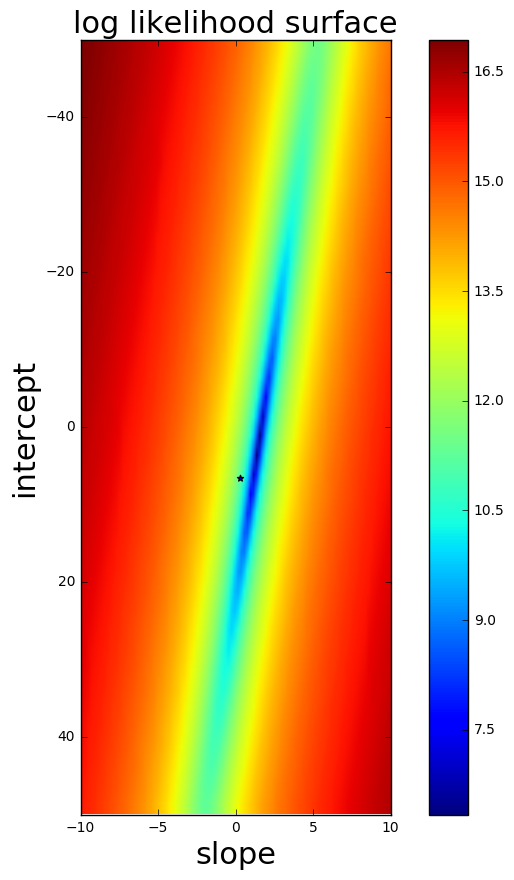

In [48]:
plt.figure(figsize=(10,10))
plt.title ("log likelihood surface", fontsize = 22)
plt.scatter(result_ec.params[1], result_ec.params[0],marker='*')
plt.imshow(np.log(Lsurface), extent = [-10,10,50,-50], aspect=0.5)
plt.xlabel('slope', fontsize = 22)
plt.ylabel('intercept', fontsize = 22)
plt.colorbar()

### Figure 9:
Showing the log likelihood surface for a range of slope coefficients and intercepts, for the first model (logarith of Total Units as independent variable). 

The star labeled point is the slope and intercept values obtained from the regression model and minimize the error. Notice that the point is very close to the "dark blue" region. The reason why it doesnt fall exaclty inside is the level of granularity chosen in the selection of various slopes and intercepts. 

# Extra credit  #2

In [49]:
nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'BBL'],
      dtype='object')

In [50]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [51]:
extra1 = nrg[['BBL', 'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)']]
extra2 = bsize[['BBL','YearBuilt', 'NumFloors']]
extra = pd.merge(extra1, extra2, on='BBL')

In [52]:
extra = extra.dropna()
extra['Age']= 2016-extra.YearBuilt

In [53]:
extra.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),YearBuilt,NumFloors,Age
2,1.013110e+09,125.4,330000.0,1977,32.0,39
10,1.010140e+09,154.9,841709.0,1999,32.0,17
15,1.007660e+09,122.3,59468.0,1912,8.0,104
16,1.008150e+09,117.0,364000.0,1954,22.0,62
18,1.005050e+09,82.1,235370.0,1926,10.0,90


In [54]:
extra.describe()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),YearBuilt,NumFloors,Age
count,5.069000e+03,5.069000e+03,5.069000e+03,5069.000000,5069.000000,5069.000000
mean,1.012005e+09,1.163451e+03,2.151997e+05,1938.172421,15.718879,77.827579
std,5.512017e+06,4.275870e+04,3.255770e+05,106.838327,10.302383,106.838327
min,1.000048e+09,0.000000e+00,1.000000e+03,0.000000,0.000000,1.000000
25%,1.008260e+09,6.590000e+01,7.216200e+04,1920.000000,8.000000,51.000000
50%,1.012368e+09,8.300000e+01,1.164430e+05,1930.000000,13.000000,86.000000
75%,1.015140e+09,1.040000e+02,2.213150e+05,1965.000000,19.000000,96.000000
max,1.022500e+09,3.018493e+06,9.515627e+06,2015.000000,85.000000,2016.000000


In [55]:
extra = extra[(extra['Site EUI(kBtu/ft2)']> 50) & (extra['Site EUI(kBtu/ft2)']<500) & 
                            (extra['Age']<150) & (extra['NumFloors']>0)]

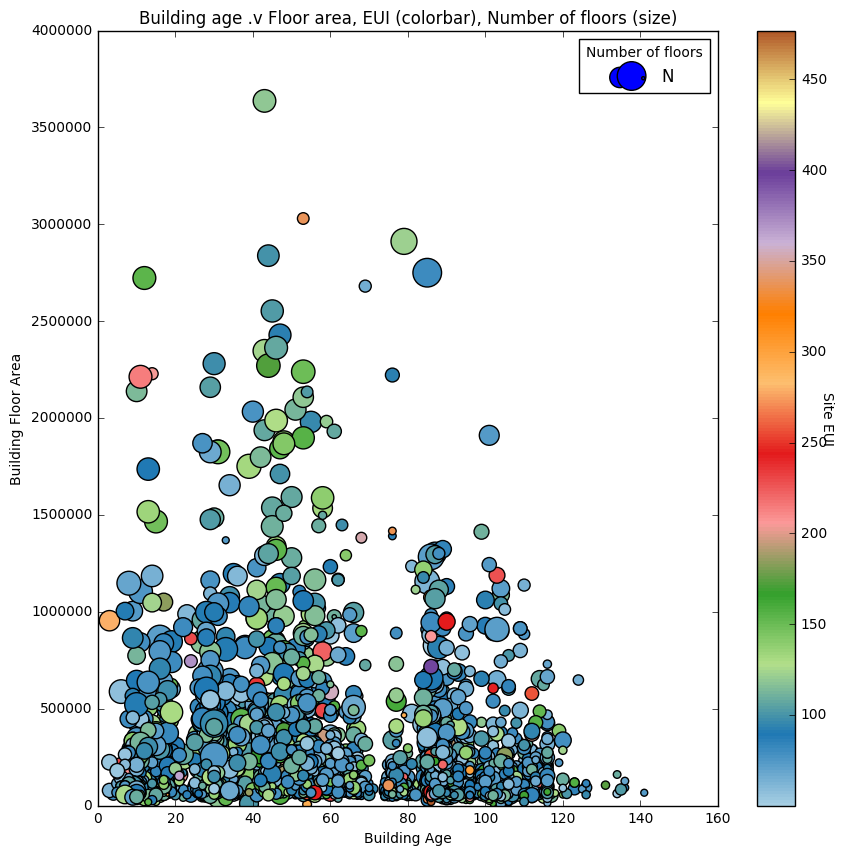

In [56]:
plt.figure(figsize=(10,10)) 
plt.scatter(extra['Age'],extra['Reported Property Floor Area (Building(s)) (ft²)'], 
            s=5*extra['NumFloors'], 
            c = extra['Site EUI(kBtu/ft2)'], cmap = 'Paired' )
plt.legend('N',title = 'Number of floors')
plt.xlabel('Building Age')
plt.ylabel('Building Floor Area')
plt.title('Building age .v Floor area, EUI (colorbar), Number of floors (size)')
plt.ylim(0, 0.4e7)
plt.xlim(0,160)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Site EUI', rotation=270)

### Figure 10:
In this plot building age is plotted against the total floor area reported. The size of the marker shows the number of floors existing in the building and colorbar the building's EUI (blue low EUI, red higher). 

We observe no significant clusters of EUI based on building size and age. One cluster that could be observed, is for buildings above 1,5M sqft, where in most cases the EUI falls in the 'green' region, with values above 100kBtu/ft2.